In [1]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns 

In [2]:
iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
target=pd.DataFrame(iris.target)
data=pd.DataFrame(iris.data)

In [4]:
df=data
df['target']=target

In [5]:
df

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
df.rename(columns={0:'Sepal Length',1:'Sepal Width',2:'Petal Length',3:'Petal Width'},inplace=True)

In [7]:
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


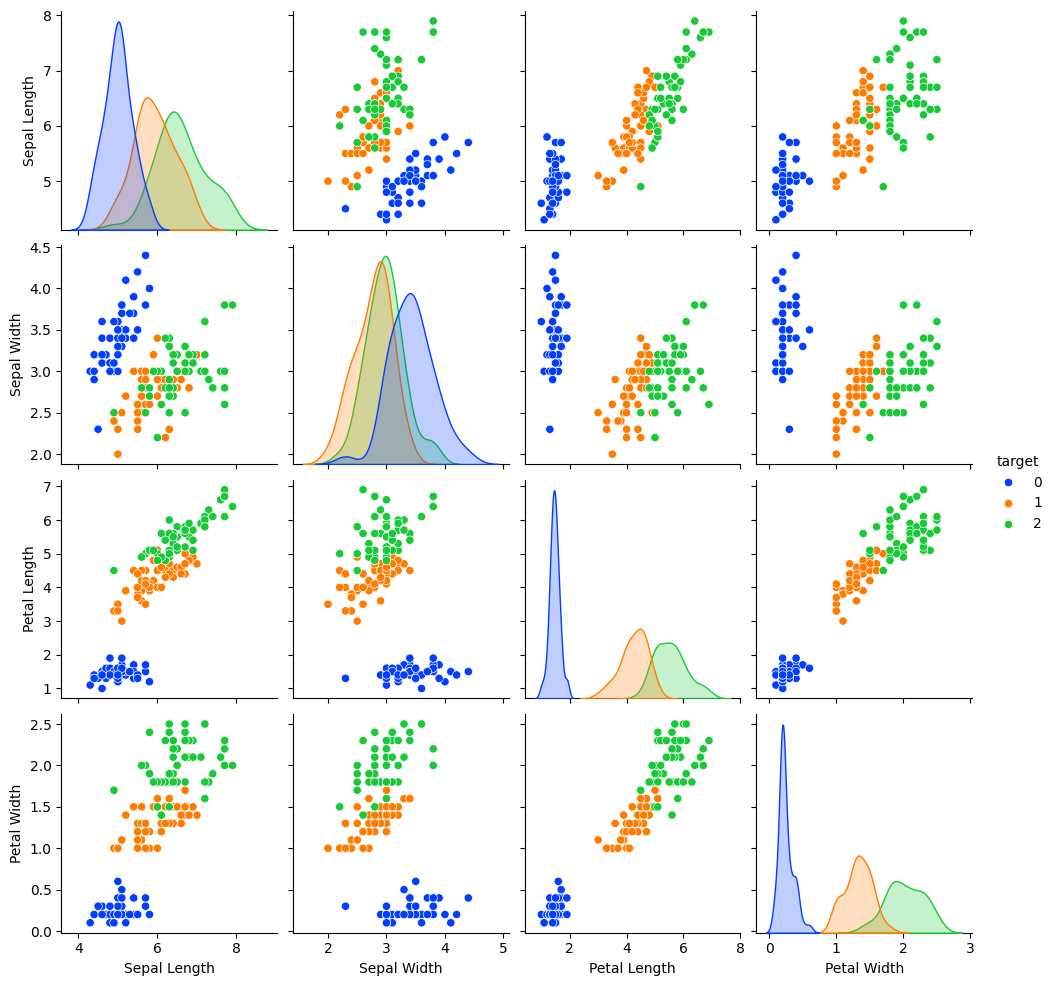

In [8]:
sns.pairplot(df,hue='target',palette='bright')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X=df.drop(columns={'target'})
Y=df['target']

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.35,random_state=10)

In [12]:
print(xtrain.shape ,ytrain.shape, xtest.shape, ytest.shape)

(97, 4) (97,) (53, 4) (53,)


In [13]:
lr=LogisticRegression(max_iter=1000)
lr.fit(xtrain,ytrain)

LogisticRegression(max_iter=1000)

In [14]:
lr.score(xtrain,ytrain)

0.979381443298969

In [15]:
pred=lr.predict(xtest)
np.mean(pred==ytest)

np.float64(0.9811320754716981)

In [16]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.neighbors import KNeighborsClassifier

In [17]:
pred=cross_val_predict(lr,X,Y,cv=5)

In [18]:
df2=df.copy()
df2['correct']=(pred==Y)
df2['pred']=pred
df2.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
target          0
correct         0
pred            0
dtype: int64

In [19]:
df2[df2['correct']==False]

,Sepal Length,Sepal Width,Petal Length,Petal Width,target,correct,pred
70,5.9,3.2,4.8,1.8,1,False,2
77,6.7,3.0,5.0,1.7,1,False,2
83,6.0,2.7,5.1,1.6,1,False,2
106,4.9,2.5,4.5,1.7,2,False,1


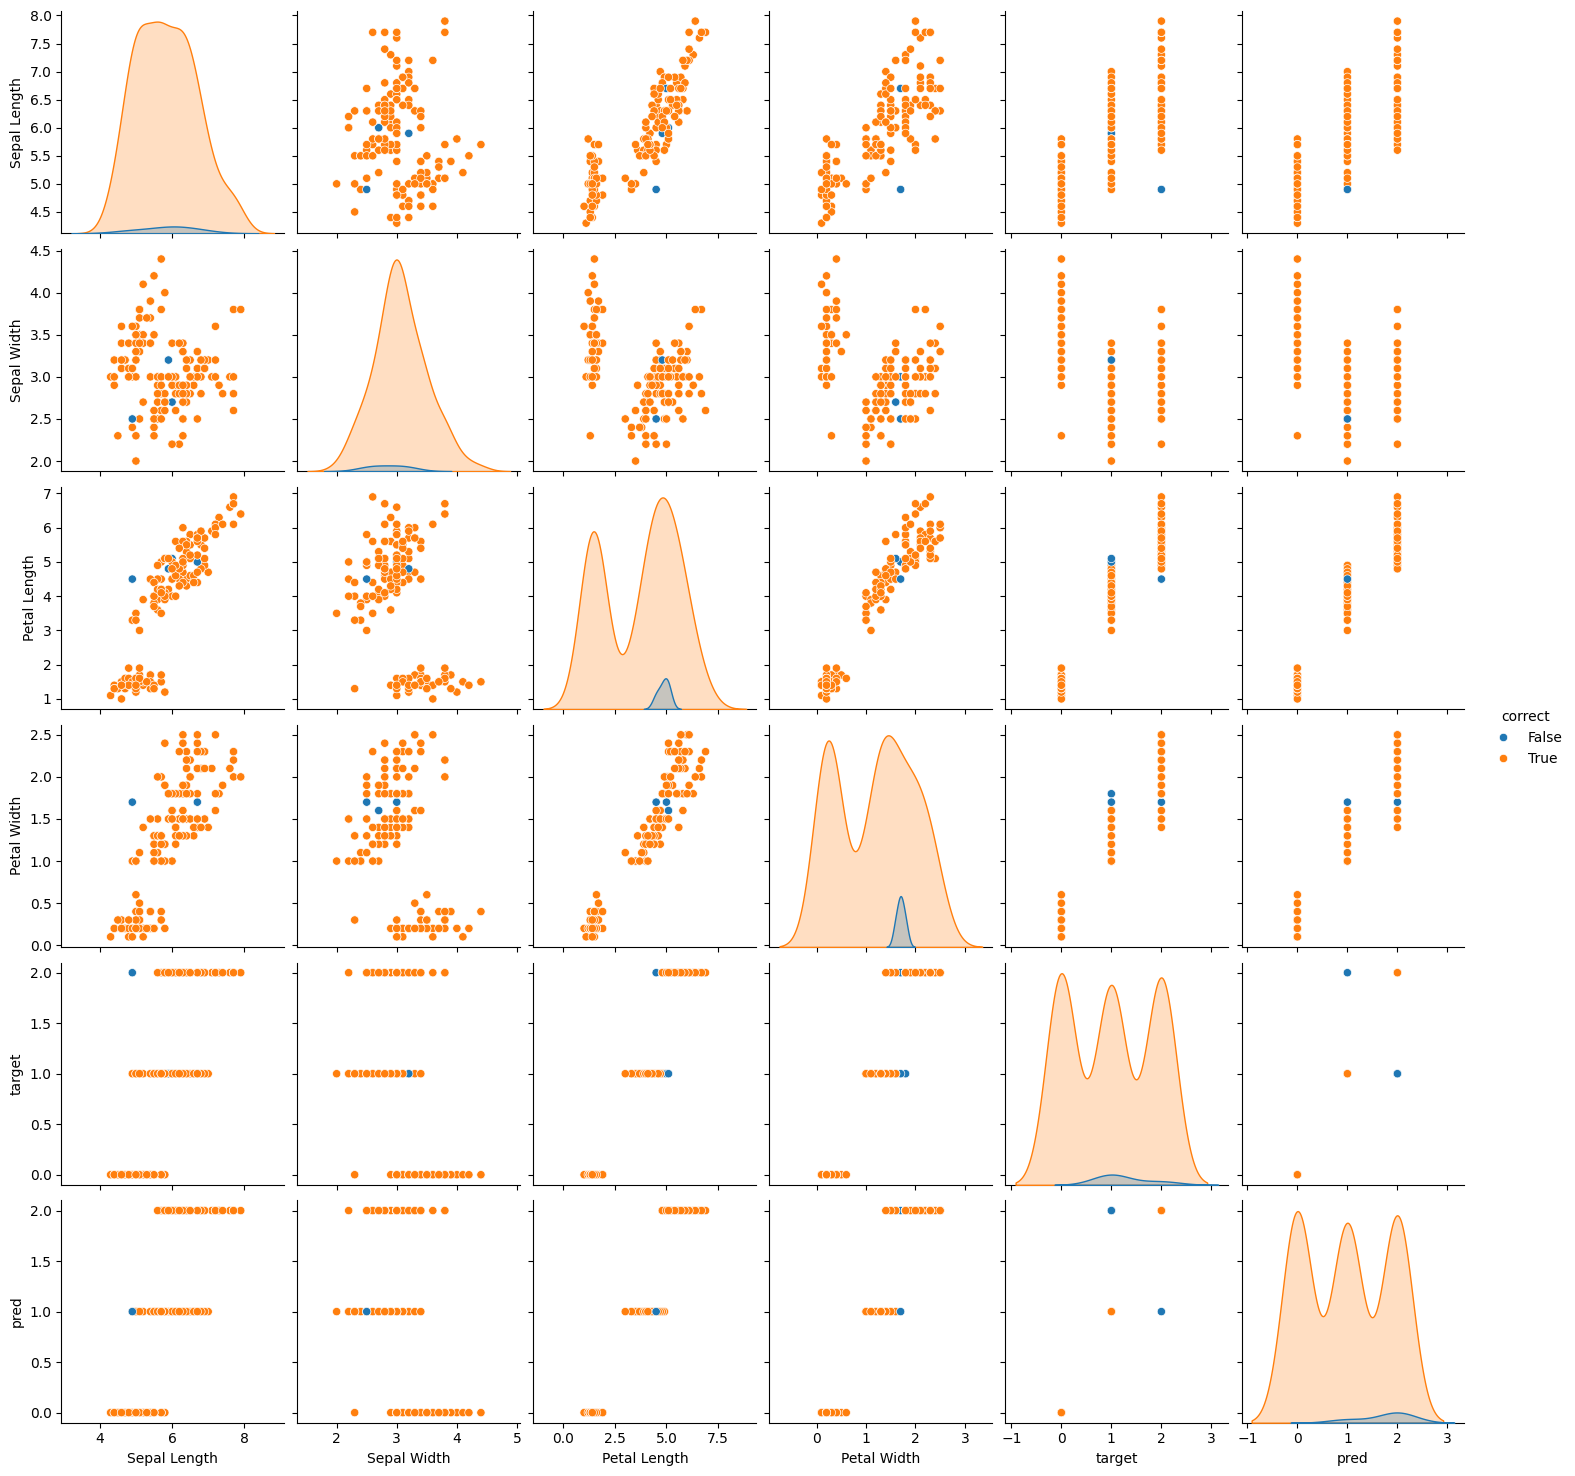

In [20]:
sns.pairplot(data=df2,hue='correct')

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(xtrain, ytrain)
knn_predictions = knn_model.predict(xtest)
np.mean(knn_predictions==ytest)*100

np.float64(96.22641509433963)